In [1]:

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools
from glob import glob
import cv2
import sys
from PIL import Image
from IPython.display import Image

In [4]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
import os

# Define the path to the train directory using a raw string (r"...")
train_dir = r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset"

# List files in the directory
files = os.listdir(train_dir)
print(files)


['test', 'train', 'valid']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to the training directory
DATADIR_Training = r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset\train"



In [7]:
train_generator = train_datagen.flow_from_directory(
    DATADIR_Training,  # This is the source directory for training images
    target_size=(200, 200),  # All images will be resized to 200 x 200
    batch_size=batch_size,
    # Specify the classes explicitly
    classes=['Abnormal', 'Mi', 'Normal'],
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical')


Found 688 images belonging to 3 classes.


In [8]:
import os

# Define the path to the validation directory
DATADIR_Valid = r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset\valid"

# Check if the directory exists
if os.path.exists(DATADIR_Valid):
    print("Validation directory exists.")
else:
    print("Validation directory does not exist. Please verify the path.")


Validation directory exists.


In [9]:
valid_generator = train_datagen.flow_from_directory(
        DATADIR_Valid,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Abnormal', 'Mi', 'Normal'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 268 images belonging to 3 classes.


In [10]:
import os

# Define the path to the validation directory
test_dir = r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset\test"

# Check if the directory exists
if os.path.exists(test_dir):
    print("Validation directory exists.")
else:
    print("Validation directory does not exist. Please verify the path.")

Validation directory exists.


In [11]:
test_generator = train_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Abnormal', 'Mi', 'Normal'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 48 images belonging to 3 classes.


In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fifth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    Flatten(),
    # 128 neuron in the fully-connected layer with dropout
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout regularization
    # 3 output neurons for 3 classes with the softmax activation
    Dense(3, activation='softmax')
])



In [14]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

total_sample = train_generator.n
n_epochs = 25

# Train the model with EarlyStopping callback
History = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=25,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(valid_generator),
                    callbacks=[early_stopping])


Epoch 1/25
22/22 [==============================] - 67s 3s/step - loss: 1.1042 - acc: 0.3706 - val_loss: 1.1105 - val_acc: 0.3358
Epoch 2/25
22/22 [==============================] - 46s 2s/step - loss: 1.1047 - acc: 0.3430 - val_loss: 1.0984 - val_acc: 0.3582
Epoch 3/25
22/22 [==============================] - 47s 2s/step - loss: 1.0932 - acc: 0.3590 - val_loss: 1.0997 - val_acc: 0.3284
Epoch 4/25
22/22 [==============================] - 44s 2s/step - loss: 1.0934 - acc: 0.3503 - val_loss: 1.1035 - val_acc: 0.3246
Epoch 5/25
22/22 [==============================] - 45s 2s/step - loss: 1.0742 - acc: 0.4142 - val_loss: 1.1353 - val_acc: 0.3358
Epoch 6/25
22/22 [==============================] - 45s 2s/step - loss: 1.0126 - acc: 0.4767 - val_loss: 1.1615 - val_acc: 0.4366
Epoch 7/25
22/22 [==============================] - 51s 2s/step - loss: 0.9094 - acc: 0.5509 - val_loss: 1.0356 - val_acc: 0.4888
Epoch 8/25
22/22 [==============================] - 45s 2s/step - loss: 0.7737 - acc: 0.65

In [15]:
class_dict = test_generator.class_indices
print(class_dict)

{'Abnormal': 0, 'Mi': 1, 'Normal': 2}


In [16]:
predictions = model.predict(x=test_generator, steps=len(test_generator), verbose=0)

In [17]:
test_labels = test_generator.classes

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7 5 4]
 [4 8 4]
 [7 7 2]]


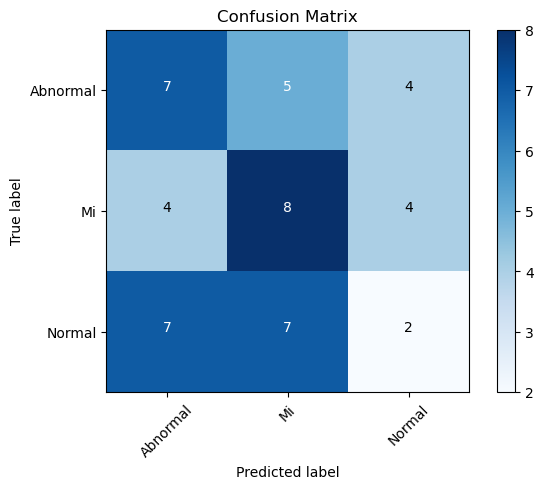

In [20]:
cm_plot_labels = ['Abnormal', 'Mi', 'Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200,200),
    batch_size=5,
    class_mode='categorical',
    shuffle=False
)

class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_validation_samples = 129
batch_size = 5

# Confution Matrix and Classification Report
Y_pred = model.predict(test_generator, nb_validation_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Print Classification Report
print("\n\nClassification Report\n")
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Found 48 images belonging to 3 classes.
10/10 [==============================] - 2s 157ms/step


Classification Report

              precision    recall  f1-score   support

    Abnormal       0.56      0.62      0.59        16
          Mi       0.60      0.75      0.67        16
      Normal       0.80      0.50      0.62        16

    accuracy                           0.62        48
   macro avg       0.65      0.62      0.62        48
weighted avg       0.65      0.62      0.62        48



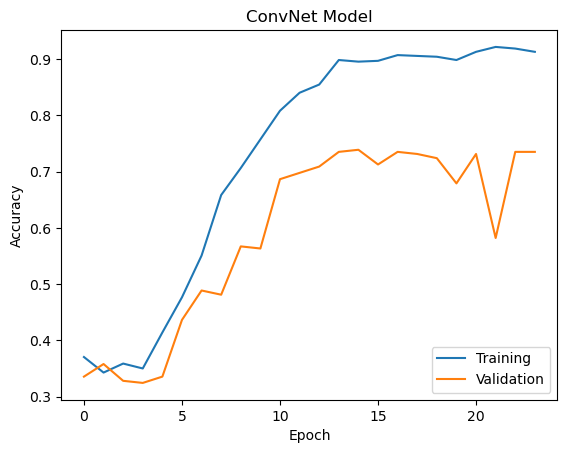

In [22]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('ConvNet Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

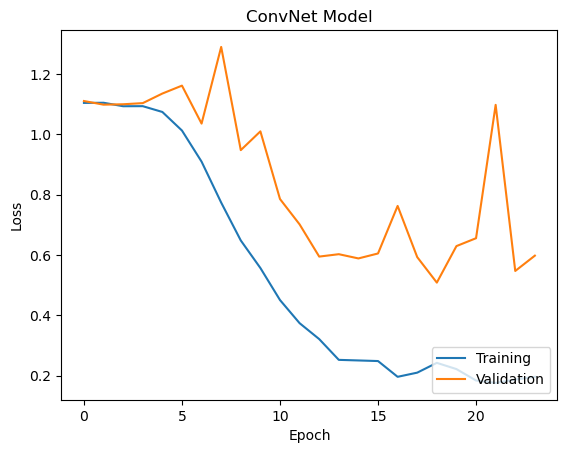

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('ConvNet Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

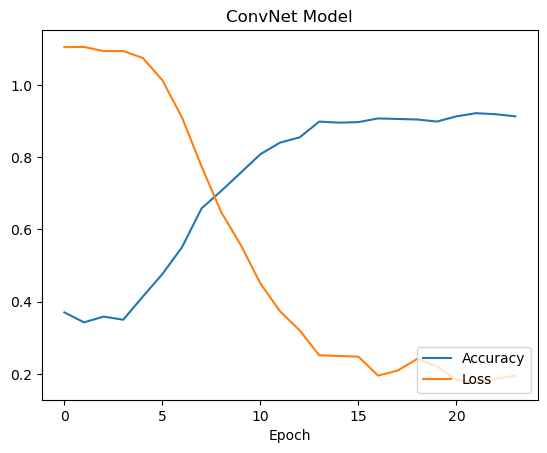

In [24]:
plt.plot(History.history['acc'])
plt.plot(History.history['loss'])
plt.title('ConvNet Model')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='lower right')
plt.show()

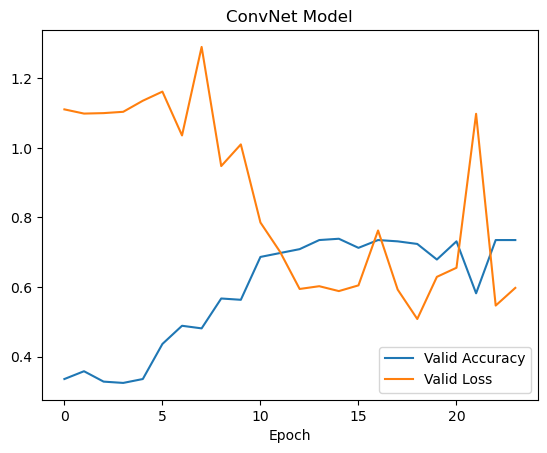

In [25]:
plt.plot(History.history['val_acc'])
plt.plot(History.history['val_loss'])
plt.title('ConvNet Model')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Valid Accuracy', 'Valid Loss'], loc='lower right')
plt.show()

In [27]:
import os

# Define the directory to save the model
save_dir = r"C:\Users\ksk_k\Desktop\MAJOR PROJECT COMPLETE\major project code"

# Ensure that the directory exists, if not create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the complete file path including the directory and the file name
model_file_path = os.path.join(save_dir, "convnet3.h5")

# Save the model
model.save(model_file_path)

print(f"Model saved at: {model_file_path}")



Model saved at: C:\Users\ksk_k\Desktop\MAJOR PROJECT COMPLETE\major project code\convnet3.h5


In [28]:
import os

# Define the path to the parent folder containing the "Dataset_Testing" folder
parent_folder_path = r"C:\Users\ksk_k\Desktop\MAJOR PROJECT COMPLETE\major project code"

# Define the path to the "Dataset_Testing" folder
dataset_testing_folder_path = os.path.join(parent_folder_path, "Dataset_Testing")

# Check if the Dataset_Testing folder exists
if os.path.exists(dataset_testing_folder_path):
    print("Dataset_Testing folder exists.")
else:
    print("Dataset_Testing folder does not exist.")


Dataset_Testing folder exists.


In [29]:
import os

def prepare_image(file):
    img_path = r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset_Testing"
    img = image.load_img(os.path.join(img_path, file), target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)



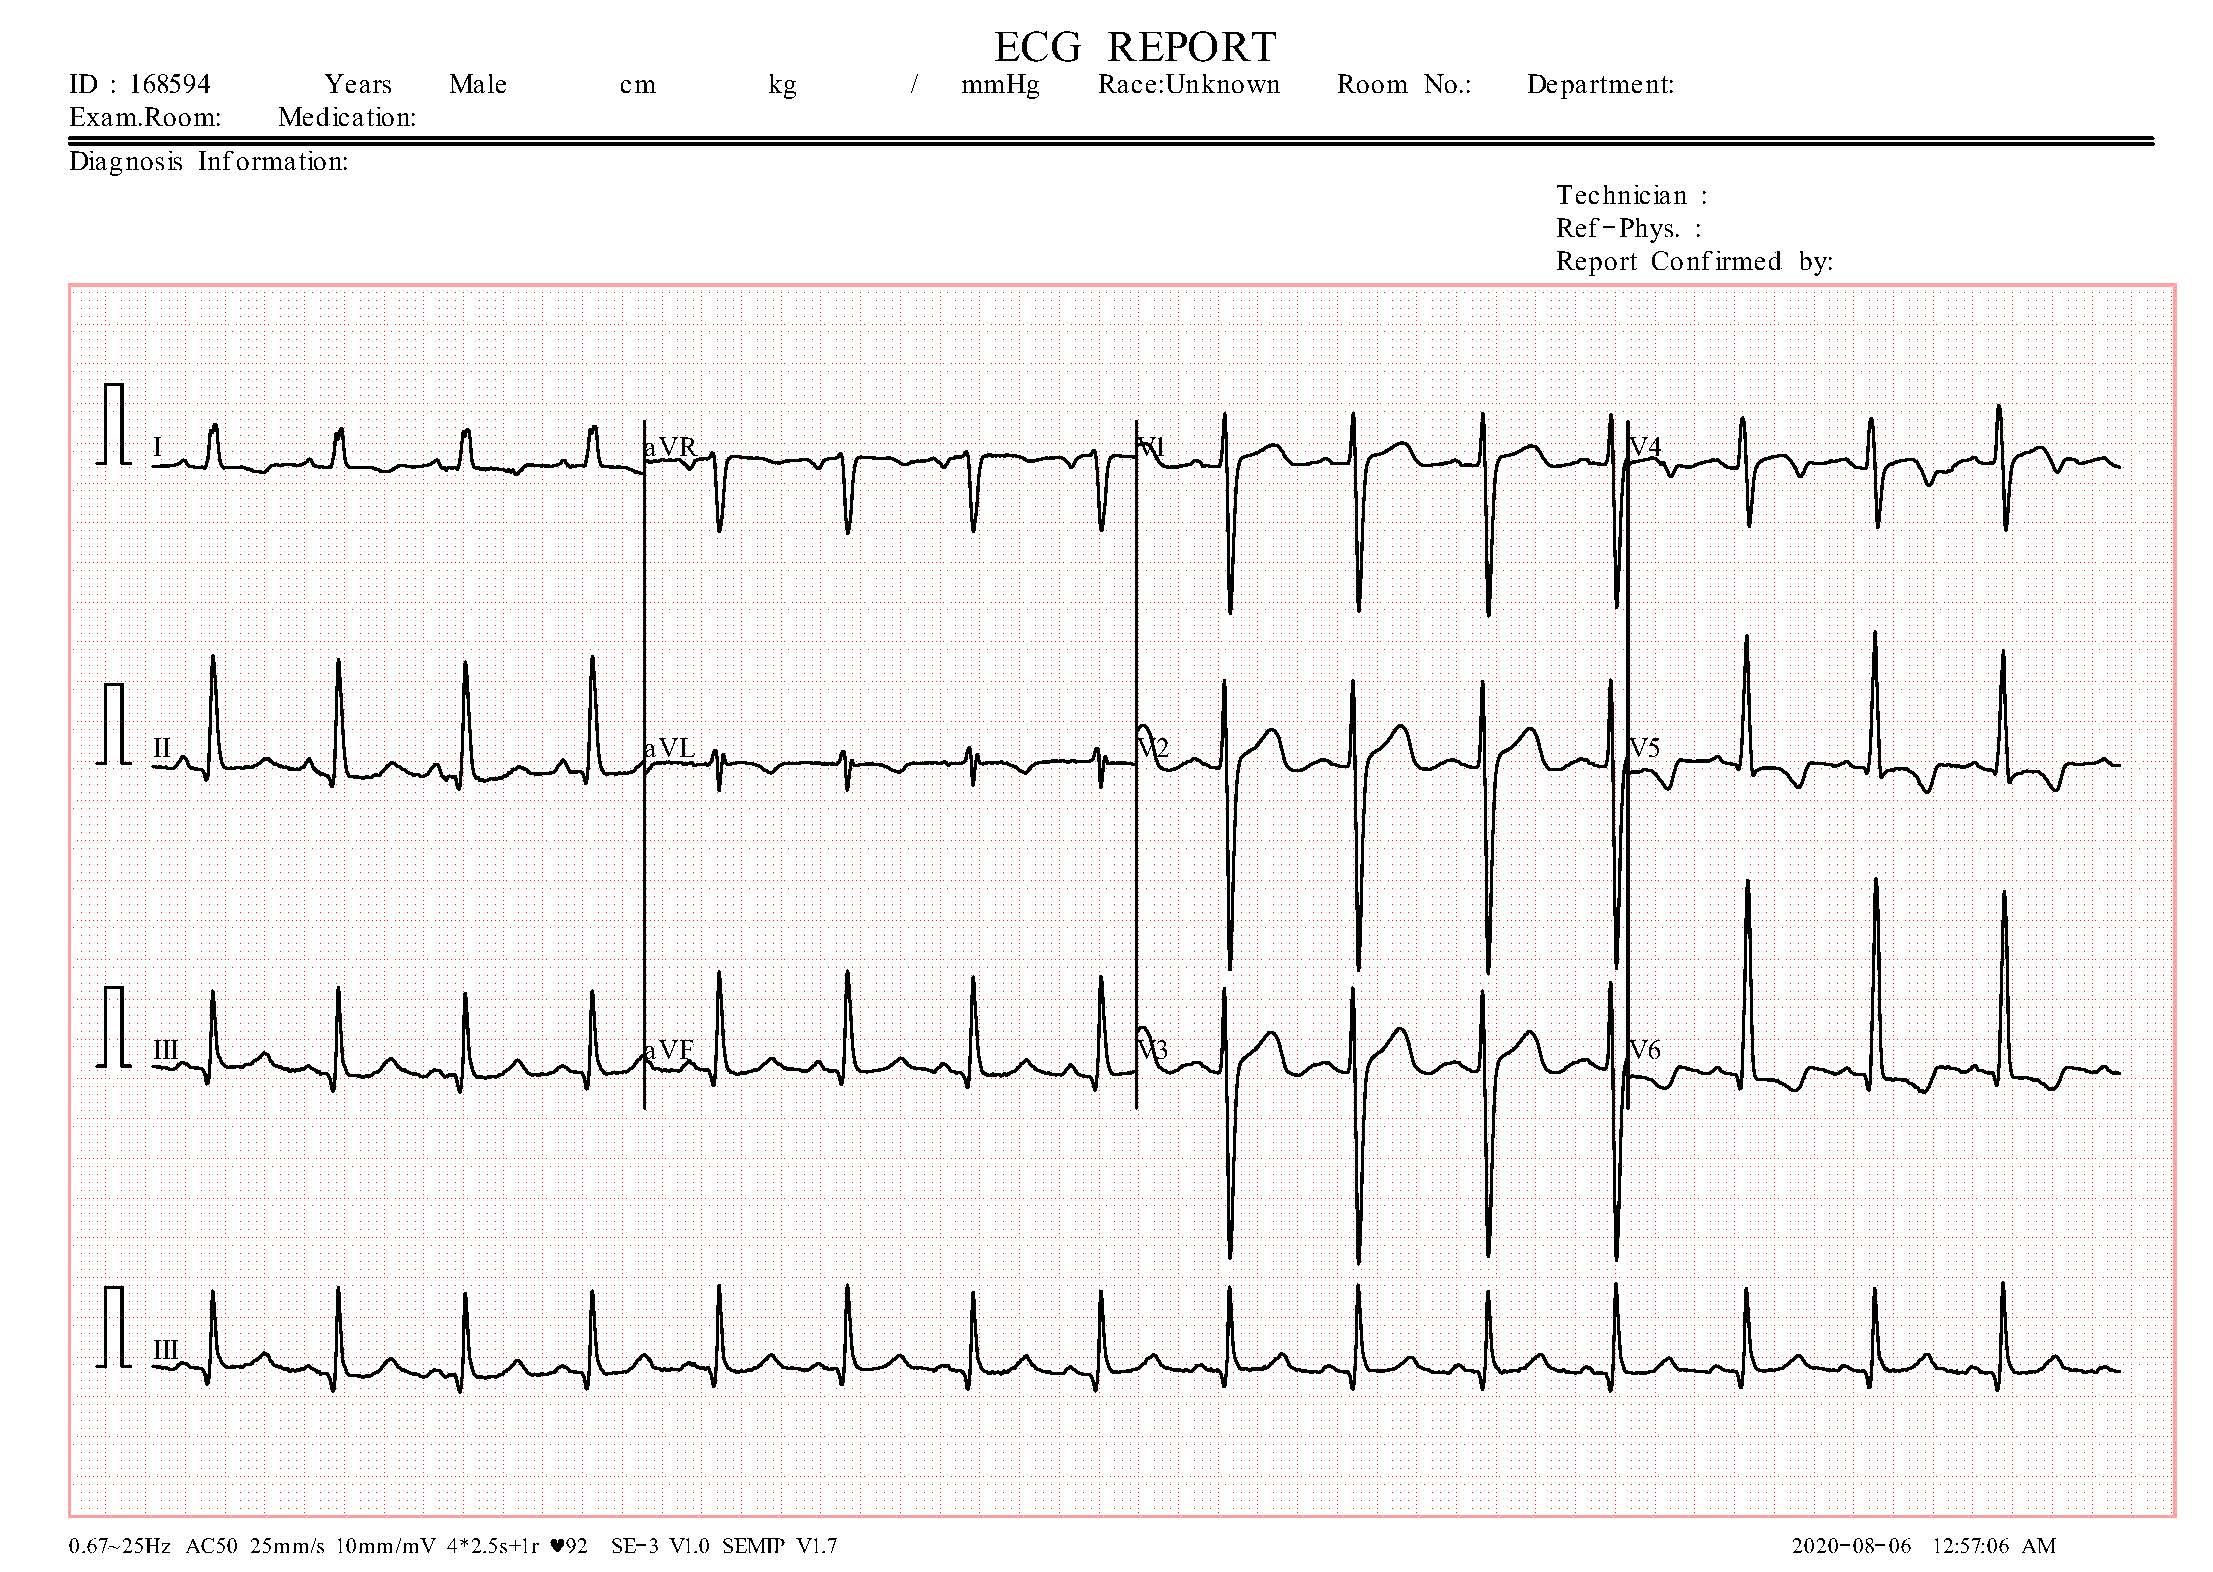

In [32]:
Image(filename=r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset_Testing\abnormal(1).jpg", width=500, height=500)


In [33]:
cm_plot_labels = ['Abnormal', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image(r'abnormal(1).jpg')
model = tf.keras.models.load_model("convnet3.h5")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]

1/1 [==============================] - 0s 82ms/step
[[0.89696944 0.10159319 0.00143743]]
Probability
[89.696945]


'Abnormal'

In [ ]:
Image(filename=r"C:\Users\ksk_k\Desktop\CARDIOGAN\CardioGAN--ECG-Analyser-GAN-Deep-learning\ECG_CLASSIFICATION_CODE\Dataset_Testing\abnormal(2).jpg", width=500, height=500)


In [ ]:
cm_plot_labels = ['Abnormal', 'History', 'Mi', 'Normal']
import numpy as np 
preprocessed_image = prepare_image('history(1).jpg')
model = tf.keras.models.load_model("ECGConvNet.model")
predictions = model.predict(preprocessed_image)
arr = np.array(predictions)
print(arr)
max_index_row = np.argmax(arr, axis=1)
#print(max_index_row[0])
print("Probability")
print(arr[0, max_index_row]*100)
cm_plot_labels[max_index_row[0]]